## 1.0  Introduction

Import the functions we need from the different libraries.

%matplotlib inline outputs the plotting commands below the cells that prodce4d it so that we can view it.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We have a file named Advertising.csv.  It contains 200 periods of sales observations.  Each period of observation is also accompanied by data on TV, Radio and Newspaper advertising.

The data from the file is read in as a pandas dataframe.

In [3]:
Advertising = pd.read_csv('PredictiveAnalytics\Advertising.csv')

One way of having an overview of the amount of data is to look at the shape of the dataframe.  

The dataframe contains 200 rows and five columns.

In [4]:
Advertising.shape

(200, 5)

Let us take a look at what the dataset looks like.  The numbers in the first column is the defult index given to the dataframe.  There is a first column, which is the observation number, that is un-named.  It looks awkward here.

In [12]:
Advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Before we rename the first column, we want to know exactly how it is named.  We use the commands below to find out the information we need.

In [19]:
Advertising.columns.values

array(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

We can re-name the first column by using the .rename method as shown below.

In [4]:
Advertising.rename(columns = {'Unnamed: 0': 'Obs'}, inplace=True)
Advertising.head()

,Obs,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## 2.0  Descriptive Understanding

We take a first look at the data visually by plotting a few simple charts.

These charts can tell us very quickly whether there is a relationship between the different modes of advertising and sales.

We plot each of the three modes of advertising, namely, TV, Radio and Newspaper, against sales in their own plot.

The first block of codes (starting with fig) sets the parameters of the charts.  
The three charts will be on one row (nrows=1, ncols =3), they will all share the y-axis (sharey = True).

fig.text command places the text in the location specified.  The specification is in relation to the figure area.
fig.text(0.08,0.5 ....) - the first number refers to the horizontal position and the second number refers to the vertical position

The ax1.plot plots the scatterplot between TV advertising and Sales.  
ax1.legend just tells the program where to put the labels (in this case it is lower right)

np.ployfit is a numpy function that does a least square fit.  It can do a polynomial fit, y = a<sub>o</sub> + a<sub>1</sub>x + a<sub>2</sub>x<sup>2</sup> + . . . + a<sub>2</sub>x<sup>deg</sup>

It returns the coefficents a<sub>i</sub> that minimizes the squared errors.

Since we are only doing a linear function, Sales = a<sub>o</sub> + a<sub>1</sub>TV, we use deg=1

np.poly1d() takes the coefficents of a polynomial and returns an object that represents the polynomial function.

np.poly1d([a,b]) returns ax + b (see the codes two cells from this one - with the print(z) and print(p) codes) to have a better idea.

Here we assign p = np.poly1d() and use apply the equation to the data from the Advertising in ax1.plot().
So, we are plotting the TV advertising against the expected results (from a linear regression  -wich we cover in more detail later).  This is the straight line that we see in each plot - this straight line minizes the squared errors.

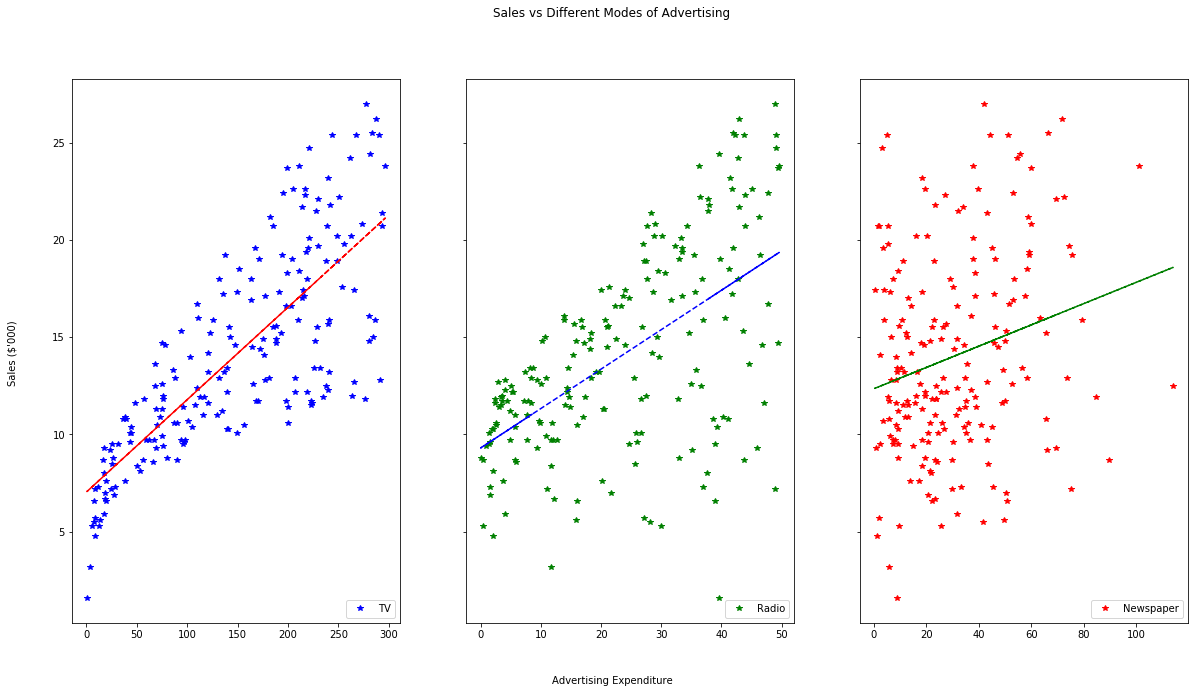

In [47]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1, ncols = 3, sharey=True,figsize = (20,10))
fig.text(0.08,0.5,'Sales ($\'000)', va = 'center', rotation='vertical' )
fig.text(0.5,0.04, 'Advertising Expenditure', ha = 'center')
fig.suptitle('Sales vs Different Modes of Advertising', ha='center')



ax1.plot(Advertising['TV'],Advertising['Sales'],'b*', label = 'TV')
ax1.legend(loc = "lower right")


z = np.polyfit(x= Advertising['TV'],y = Advertising['Sales'],deg =1)
p = np.poly1d(z)
ax1.plot(Advertising['TV'],p(Advertising['TV']),'r--')


ax2.plot(Advertising['Radio'],Advertising['Sales'],'g*', label = 'Radio')
ax2.legend(loc = "lower right")


z = np.polyfit(Advertising['Radio'],Advertising['Sales'],1)
p = np.poly1d(z)
ax2.plot(Advertising['Radio'],p(Advertising['Radio']),'b--')



ax3.plot(Advertising['Newspaper'],Advertising['Sales'],'r*', label='Newspaper')
ax3.legend(loc = "lower right")


z = np.polyfit(Advertising['Newspaper'],Advertising['Sales'],1)
p = np.poly1d(z)
ax3.plot(Advertising['Newspaper'],p(Advertising['Newspaper']),'g--')



Below is an illustration of what z and p from the above codes contain.

In [44]:
print(z)
print(p)

[ 0.0546931  12.35140707]
 
0.05469 x + 12.35


The graphs above indicates that there may be positve relationship between the different modes of advertising and sales - that is, higher level of advertising leads to higher level of sales.  We note however, that the effect is not equally strong for the different modes of advertising.  TV seems to have the strongest effect (steepest line) and Newspaper the weakest (least steep).

Note that we can try to fit the surface (instead of a line) by setting the degree=2.



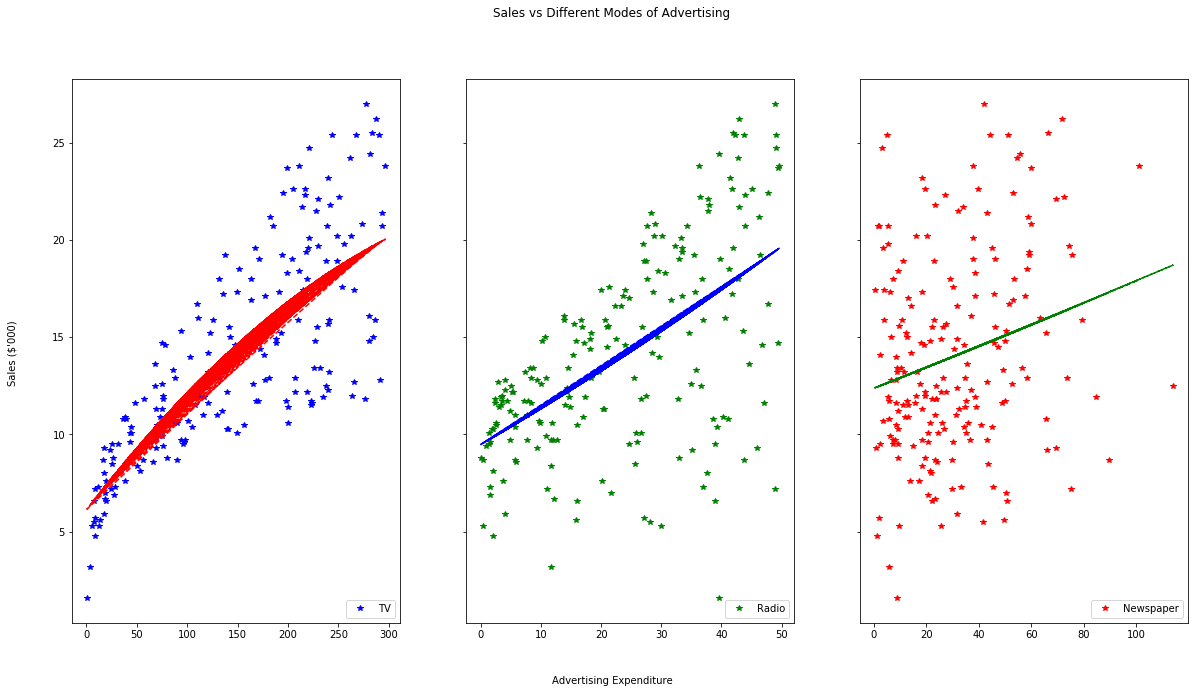

In [50]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1, ncols = 3, sharey=True,figsize = (20,10))
fig.text(0.08,0.5,'Sales ($\'000)', va = 'center', rotation='vertical' )
fig.text(0.5,0.04, 'Advertising Expenditure', ha = 'center')
fig.suptitle('Sales vs Different Modes of Advertising', ha='center')



ax1.plot(Advertising['TV'],Advertising['Sales'],'b*', label = 'TV')
ax1.legend(loc = "lower right")


z1 = np.polyfit(x= Advertising['TV'],y = Advertising['Sales'],deg =2)
p1 = np.poly1d(z1)
ax1.plot(Advertising['TV'],p1(Advertising['TV']),'r--')


ax2.plot(Advertising['Radio'],Advertising['Sales'],'g*', label = 'Radio')
ax2.legend(loc = "lower right")


z2 = np.polyfit(Advertising['Radio'],Advertising['Sales'],2)
p2 = np.poly1d(z2)
ax2.plot(Advertising['Radio'],p2(Advertising['Radio']),'b--')



ax3.plot(Advertising['Newspaper'],Advertising['Sales'],'r*', label='Newspaper')
ax3.legend(loc = "lower right")


z3 = np.polyfit(Advertising['Newspaper'],Advertising['Sales'],2)
p3 = np.poly1d(z3)
ax3.plot(Advertising['Newspaper'],p3(Advertising['Newspaper']),'g--')



In [51]:
print(z1, '\n', z2, '\n' , z3)
print(p1, '\n', p2, '\n' , p3)

[-6.84693373e-05  6.72659270e-02  6.11412013e+00] 
 [4.92713161e-04 1.78888807e-01 9.48610308e+00] 
 [2.42449479e-05 5.27438309e-02 1.23768891e+01]
            2
-6.847e-05 x + 0.06727 x + 6.114 
            2
0.0004927 x + 0.1789 x + 9.486 
            2
2.424e-05 x + 0.05274 x + 12.38


## 3.0  Regresssion Analysis

We know proceed to analyse the strength of the effect of the different modes of advertising on sales.  There are a lot of possible statistical models that can be tested but we use the simplest linear model here.

We first test the effect of each mode of advertising on sales individually and the effect when the modes of advertising are combined.

We call our analysis linear regression analysis.


Note the two methods of using the statsmodels library.



We use "statsmodels.formula.api".  

Our model is Sales = Intercept + a*TV.  The code will estimate the value of the intercept and of "a"


In [5]:
from statsmodels.formula.api import ols
modelTV = ols("Sales~TV", Advertising).fit()
print(modelTV.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 04 Sep 2018   Prob (F-statistic):           1.47e-42
Time:                        09:58:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

Information about the OLS Regression Results

Dep. Variable:  Response variable in the model
Model: The type of model used to fit the data
Method:  How parameters of the model is calculated
No. of Observations:  Number of observations or data points
Df Residuals:  Degrees of freedom.  Computed by (number of observations - number of parameters estimated)
Df Model: Number of parameters in the model (not including the intercept)
Covariance Type: the normal covariance computation without any impostion of additional techniques to make it more precise and less susceptible to effects of outliers 

R-squared: The coefficient of determination.  Measures how well the model (regression line) fits the data points.  Ranges from 0 (no fit at all) to 1 (perfect fit).
Adj. R-squared: Adjustment of R-squared value for the number of observations and the Df of residuals
F-statistics: A measure of statistical significance of the fit of the model.  Computed by (mean squared error of model divided by mean squared error of the residuals). Range from 0 to arbitrarily large number.
Prob (F-statistic):  Probability that all the regression coefficients are 0 (that is the null hypothesis). A very low value (usually less than 0.05) means that the null hypothesis is to be rejected and some of the coefficients are not zero.  
Log-Likelihood:  The log of th likelihood function
AIC: The Akaike Information Criterion.  Adjusts the log-likelihood based on number of observations and the complexity of the model.
BIC: The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.

In the second table, you see that there are two rows, one for each parameter estimated:  one for Intercept and one for the predictor.

coef.:  The value of the parameters
std err:  The basic standard error of the estimate of the coefficient.
t:  The t-statistic value of the parameter.  Computed by dividing the coef. with the std err.
P>|t|:  The null hypothesis is that coef = 0.  This P>|t| value measures the probability of the t-value obtained if the null hypothesis is true. We usally set a hurdle of 5%.  Hence if the P>|t| is less than 5%, we usually reject the null hypothesis and say that coef is signficantly different from 0.
[0.025  0.975] :  This is an estimate that there is a 2.5% probability that the coef. of the parameters will be below the value given under the "0.025" heading and 97.5% above the value given under the "0.975" heading.

The third table is not so relevant at this point but provides statistical test of the distribution of the residuals.
Omnibus:  Combined statistical test for the presence of skewness and kurtosis
Prob (Omnibus):  The above statistic that is turned into a probability.  Small value of this (<0.05) indicates that the residulas are non-normal.
Skew:  A measure of the symmetry of the data about the mean.  Normally-distributed errors should be symmetrically distributed about the mean.  The nearer is skew to 0, the more symmetric it is.
Kurtosis:  A measure of the shape of the distribution.  Compares the amount of data close to the mean with those that are far away from the mean (in the tails).  A number close to 3 indicates that the distribution is closer to a normal distribution.
Durbin-Watson:  A test for the presence of autocorrelation (that the errors are not independent).  Often important in time-series analysis. Small values indicate that autocorrelation is present.  The range is between 0 and 4.  Autocorrelation is indicated if the value is less than 1
Jacque-Bera (JB):  A test of whether the data has skewness and kurtosis matching a normal distribution.  A smaller value is more indicate of a match to normal distribution than a large value.  
Prob (JB):  The above statistic turned into a probability.  This is not significant (p > 0.05) so we do not reject the null hypothesis that the skewness and kurtosis of the data firs that of a normal distribution.
Cond. No A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).


We then use our results to predict the sales given the level of advertising.

The model used is:

Sales = 7.03 + 0.0475 TV

For every $100 increase in advertising, we expect a $4,000 increase in sales (the sales are given in units of $'000)

We wish to predict the sales given the TV advertising level of $295 


In [15]:

predictSales = modelTV.predict({'TV':[295]})
print(predictSales)

0    21.055902
dtype: float64


If no predictors are provided, the observations of TV from the dataset, Advertising, used as the predictors in the models.

Again, the estimated sales is based on the estimated equation, Sales = 7.03 + 0.0475TV.

Since there are 200 observations, there will be 200 predictions as given below.

In [41]:
predictSales = modelTV.predict()
print(predictSales)

[17.97077451  9.14797405  7.85022376 14.23439457 15.62721814  7.44616232
  9.76595037 12.74649773  7.44140866 16.53041431 10.17476548 17.23871025
  8.16396559 11.66741599 16.73482186 16.32125309 10.25557777 20.40940417
 10.32212907 14.03474068 17.41459582 18.31779199  7.6600772  17.88520856
  9.99412625 19.52997632 13.82557947 18.44614092 18.85970969 10.38868036
 20.95607553 12.39948025 11.653155   19.65832525 11.58185004 20.85149492
 19.72012288 10.58358059  9.08142275 17.87094757 16.65876324 15.44657891
 20.98935118 16.86792445  8.22576322 15.35625929 11.2966302  18.43663359
 17.83291826 10.21279479 16.53041431 11.80527225 17.31952254 15.71278409
 19.52046899 16.48763133  7.37961102 13.50708398 17.05331735 17.04856369
  9.57580381 19.45391769 18.4081116  11.91460652 13.26464711 10.31262174
  8.52999772 13.65444756 18.31779199 17.3385372  16.49713866 12.25211667
  8.30657551 13.18383482 17.17691262  7.83596277  8.33985116 12.76075872
  7.28929141 12.54684384 10.66439288 18.43187992 10

We do the linear regression analysis for Radio advertising below.

In [21]:
modelRadio = ols("Sales~Radio", Advertising).fit()
print(modelRadio.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 04 Sep 2018   Prob (F-statistic):           4.35e-19
Time:                        11:13:26   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

The code below illustrates use of multiple predictors by associating a list [11.34,15.26,17.39] to the predictor "Radio"

In [22]:
predictSalesRadio = modelRadio.predict({'Radio':[11.34,15.26,17.39]})
print(np.around(predictSalesRadio,2))   #limit the number of decimal places printed to two

0    11.61
1    12.40
2    12.83
dtype: float64


When we have more than one predictor, we are carrying out multiple linear regression.  Linear in a sense that we do not raise the power of the predcitor to more than 1. 

The model below is then:

Sales = intercept + b<sub>0</sub>TV + b<sub>1</sub>Newspaper
    
Estimate of intercept, b<sub>0</sub> and b<sub>1</sub> are made

In [31]:
modelTVNews = ols("Sales~TV+ Newspaper", Advertising).fit()
print(modelTVNews.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           3.95e-45
Time:                        17:18:18   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.0

Notice that we use modelTVNews.summary() to print out the whole list of statistics.

There are other methods that can be used on the output of the ols fitting that we did above (in this case, the output is stored in modelTVNews).

These include
(i)  .predict:  use the model to predict the response variables from a set of given predictors (we have seen this used before)
(ii)  .params :  output the intercept and coefficient of the model (illustrated below)
(iii)  .bse : the standard errors of the intercept and coefficients  
(iv)  .fittedvalues :  applying the model to the predictors in the dataset to predict the response

The full list of methods can be found here: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults

In [32]:
modelTVNews.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [34]:
modelTVNews.bse

Intercept    0.525338
TV           0.002581
Newspaper    0.010174
dtype: float64

In [35]:
modelTVNews.fittedvalues

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
5       9.499445
6       9.510924
7      11.925419
8       6.222518
9      16.083262
10      9.945228
11     16.021516
12      9.805257
13     10.666196
14     17.381579
15     17.278653
16     13.995865
17     21.440393
18      9.829727
19     13.528088
20     18.379490
21     17.948453
22      8.587327
23     17.641044
24      9.506109
25     18.967556
26     13.034296
27     18.048554
28     18.456595
29     10.890326
         ...    
170     8.933646
171    15.586198
172     7.445942
173    14.239121
174    16.785052
175    20.610266
176    18.322864
177    15.314058
178    19.800514
179    14.320051
180    13.486699
181    17.234475
182     9.724113
183    22.438692
184    19.005059
185    16.256398
186    13.493904
187    15.542563
188    19.352307
189     7.686735
190     7.884019
191     9.581306
192     7.978983
193    13.757260
194    13.061376
195     8.176802
196    10.551220
197    14.3594

## 4.0  Training and Test Data Sets

In trying to fit a predictive model, we usually divide our dataset into training and test data.  The dataset that we are working with, "Advertsing" contains our training data.  We use these to fit the various models that we are going to use to predict the sales from advertising expenditures.

We then test the model with a different set of data that was not used in estyomating the model.  We call this the test dataset.

This is to test how well our model fits the data that it has "not seen before".

Our test data is in the file "TestAdvertising.csv" which we read into the dataframe named testAdvertising.

Note that we took out the sales data from this file.

In [6]:
testAdvertising = pd.read_csv('PredictiveAnalytics\TestAdvertising.csv')

In [21]:
testAdvertising.head()

,id,TV,Radio,Newspaper,Sales
0,1,79.21,23.69,74.74,-1
1,2,110.74,42.72,40.46,-1
2,3,170.09,21.73,31.03,-1
3,4,269.26,12.14,113.17,-1
4,5,60.34,3.51,72.33,-1


Our testAdvertisng has fifty observations.  Below, we demonstrate using the model 

Sales = 5.77 + 0.0469TV + 0.0442 Newspaper 

to predict (forecast) what the sales level would be like given the level of advertsing on TV and Newspaper for the observations in the testAdvertising.

In [22]:
resForecast = modelTVNews.predict(testAdvertising)
print (np.around(resForecast,2))

0     12.79
1     12.76
2     15.12
3     23.41
4     11.80
5     19.35
6     19.57
7     17.39
8     19.19
9      9.69
10    13.59
11    11.95
12    17.14
13    13.32
14    17.24
15    12.79
16    19.37
17    20.10
18    13.34
19    19.82
20    23.77
21    11.25
22    17.29
23     8.43
24    13.32
25    13.46
26     8.58
27    12.17
28    19.03
29    13.54
30    15.40
31    14.52
32    12.84
33    11.64
34    21.96
35    18.10
36    19.66
37     9.96
38    20.81
39    14.08
40    20.64
41    17.82
42    17.88
43    14.79
44    16.83
45    19.04
46     7.03
47    16.19
48    16.51
49    19.78
dtype: float64


What do we do with the predictions we make?

We use them to compare how well the different models fit the data - an assumption that a model that fits the data better is more useful.  

Remeber that we do have the actual Sales for the test data.  We test the goodness of the model by comparing our forecast of the Sales (like the ones made above) with the actaul Sales.

We use a statistic called mean squared error (MSE) to compute the goodness of fit.  The formula is:

MSE = (Forecast - Actual)<sup>2</sup> / n, where n is the number of forecasts (50 in our example above)

The difference between forecast and actual values are squared to prevent negative differences from cancelling out positive differences.

We write a function below to compute the mean squred error.

In [11]:
def MSE(Forecast,Actual):
    return np.around(np.mean((Forecast-Actual)**2),2)

Our actual sales is in another file so we read in in as shown below.  Depends on how your data is organized, it may be in the same file as the rest of your test data.

Note that the file is read into the dataframe we name as actualSalesOfTest.  There are two columns.  The data we want is in the column named "Ground-Truth-Sales".

In [7]:
actualSalesOfTest = pd.read_csv('PredictiveAnalytics\GroundTruthSales.csv')
actualSalesOfTest.head()

,id,Ground-Truth-Sales
0,1,11.13
1,2,16.11
2,3,14.54
3,4,17.44
4,5,6.34


We can use the mean squared error (MSE) measure to evaluate how well each individaul model fits:

(i) the training data - this is the data set that is used to estimate the parameters of the model; and
(ii) the test data - this is the data set that is not used to estimate the model.

The first cell below is the code to forecast the sales given the value of the predictor (in this case, the TV advertising) from the training data.  There are 200 observations.  We then compute how well the model fits the training data - this is the trainingMSETV.

The second cell below forecast the sales using the TV advertising data from the test data set.  There are 50 observations.  WE compute how well the model fits the test data - testMSETV 

In [26]:
ForecastTrainingByTV = modelTV.predict(Advertising)
trainingMSETV = MSE(ForecastTrainingByTV,Advertising.Sales)


print(trainingMSETV)

10.51


In [27]:
ForecastTestByTV=modelTV.predict(testAdvertising)
testMSETV=MSE(ForecastTestByTV,actualSalesOfTest['Ground-Truth-Sales'])
print(testMSETV)

6.48


The above shows that our model using TV advertising data fits the test data (testMSETV = 6.48) better than the training data (trainingMSETV = 10.51).  This is surpsiring as the model usually fits the training data better than the test data.

Next we estimate the parameters of all the possible models given the three advertising modes - TV, Radio and Newspaper.  We have models where we consider each mode individually, when two modes are combined in all possible combinations, and when all the three modes are considered together.

In [9]:
from statsmodels.formula.api import ols
reg = ['Sales~TV', 'Sales~Radio','Sales~Newspaper', 'Sales~TV+Radio','Sales~TV+Newspaper','Sales~Radio+Newspaper','Sales~TV+Radio+Newspaper']
model = ['modelTV','modelRadio','modelNews','modelTVRadio','modelTVNews','modelRadioNews','modelAll']

j=0
for i in reg:
   model[j] =ols(i,Advertising).fit()
   j += 1 

    
l=0
for k in model:
    print('{:^70}'.format(reg[l]),'\n')
    print(k.summary(),'\n')
    l +=1

                               Sales~TV                                

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           1.47e-42
Time:                        16:56:15   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [30]:
model[0].params

Intercept    7.032594
TV           0.047537
dtype: float64

Next, we compute the training and test MSEs for all the models below.

In [23]:
ftrain = ['ForecastTrainingByTV','ForecastTrainingByRadio','ForecastTrainingByNews','ForecastTrainingByTVRadio','ForecastTrainingByTVNews','ForecastTrainingByRadioNews','ForecastTrainingByAll']
trainMSE = ['trainingMSETV','trainingMSERadio','trainingMSENews','trainingMSETVRadio','trainingMSETVNews','trainingMSERadioNews','trainingAll']

ftest = ['ForecastTestByTV','ForecastTestByRadio','ForecastTestByNews','ForecastTestByTVRadio','ForecastTestByTVNews','ForecastTestByRadioNews','ForecastTestByAll']
testMSE = ['testMSETV','testMSERadio','testMSENews','testMSETVRadio','testMSETVNews','testMSERadioNews','testAll']

j=0
for i in model:
   ftrain[j] =i.predict(Advertising)
   trainMSE[j] = MSE(ftrain[j],Advertising.Sales) 
    
   ftest[j] = i.predict(testAdvertising)
   testMSE[j] = MSE(ftest[j],actualSalesOfTest['Ground-Truth-Sales']) 
   j += 1 

    
l=0
for k in trainMSE:
#    print(reg[l],'\t',k,'\t', testMSE[l],'\n')
    print('{:30} {:10.2f} {:10.2f}'.format(reg[l],k, testMSE[l]))
    l +=1


Sales~TV                            10.51       6.48
Sales~Radio                         18.09      13.50
Sales~Newspaper                     25.67      24.27
Sales~TV+Radio                       2.78       0.18
Sales~TV+Newspaper                   9.59       9.18
Sales~Radio+Newspaper               18.07      13.40
Sales~TV+Radio+Newspaper             2.78       0.18


From the above analysis, we see that two models have the lowest MSE.  They both have the same training MSE (2.78) and test MSE (0.18).  

These two models are:
    (i)  when using TV and Radio advertising as the predictors of sales; and
    (ii) when using TV, Radio and Newspaper advertsing as predictors of sales
    
We prefer model (i) because it uses less predictors - our preference is to use as simple a model as possible.      